# Day-65: Convolution and Pooling Layers

Yesterday(Day-64) was the "Why"; today(Day-65) is about the "How." The magic of a CNN happens in two core, brilliant layers that revolutionize feature extraction. Forget the heavy math—we'll use simple, real-world analogies to master these concepts!

They extract features like edges, shapes, textures using something called convolution and pooling operations — the building blocks of image understanding.

So, today we’ll break this down step by step, like how a CNN looks at a picture — from raw pixels to high-level patterns.

## Topics Covered:
- What is a Kernel / Filter

- Understanding Convolution Operation

- Strides and how they control feature map size

- Padding – preserving image dimensions

- Pooling Layers – Max Pooling and Average Pooling


## What is a Kernel / Filter

The Convolution Layer is where the feature extraction happens. It is composed of Kernels, which are the actual learning parameters of the CNN.

- `Analogy`: The Specialized Scanner
    - Imagine you have a team of digital scanners, each specialized for one thing:

        - Scanner 1: Only detects vertical lines.

        - Scanner 2: Only detects diagonal edges.

        - Scanner 3: Only detects red color blobs.

A Kernel (or Filter) is one of these specialized scanners. It is a small 3×3 or 5×5 matrix of weights. The CNN's job is to learn the optimal values in this matrix (the weights) that let it spot a specific pattern.

## Understanding Convolution Operation

Alright guys — now that we know what kernels or filters are, let’s understand the real hero of CNNs — the convolution operation

### What is Convolution?

Convolution is simply a mathematical operation where a small matrix (the kernel) slides across the image and computes weighted sums to produce a feature map.

So, instead of feeding the raw pixel values directly to a neural network, convolution extracts meaningful patterns — like edges, corners, or textures.

### How it Works: The Dot Product

The Kernel slides across the image (our Receptive Field) and performs a dot product (or element-wise multiplication and summation) with the patch of pixels it covers.

- If the Kernel's weights match the pattern in the pixel patch (e.g., a perfect vertical edge), the output value will be very high.

- If the Kernel doesn't match the pattern, the output will be low (close to zero).

The final output of this process is a new, smaller image called a Feature Map, which shows where that specific feature was found in the original image.

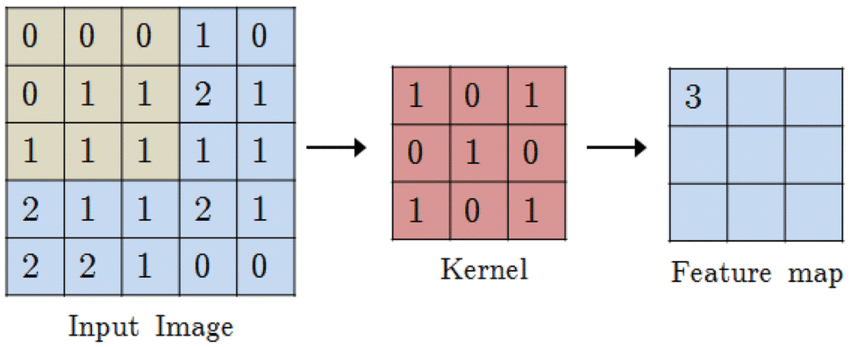

- `Analogy`:
    - Imagine scanning an image with a magnifying glass, focusing on a small patch at a time.
        - Each time you move, you take notes like —
            -“Hmm, this area looks like a vertical edge.”

    - After you finish scanning the entire image, you’ll have a map of where all vertical edges exist — and that’s your feature map!

### Why It’s Powerful?

- Instead of learning thousands of pixel relationships, CNNs learn spatial hierarchies (edges → shapes → objects).

- The same filter slides across the whole image — this means weight sharing, which reduces parameters drastically.

- Helps CNNs generalize well, even with fewer parameters compared to dense networks.

### Code Example for Convoulution operation

In [3]:
import tensorflow as tf
import numpy as np

# Create a simple 5x5 image (grayscale)
image = np.array([[1,2,3,0,1],
                  [0,1,2,3,1],
                  [3,1,0,2,2],
                  [2,0,1,3,1],
                  [1,2,2,0,0]], dtype=np.float32)

# Reshape to match Conv2D input: (batch, height, width, channels)
image = image.reshape((1, 5, 5, 1))

# Define a vertical edge detection kernel
kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]], dtype=np.float32)

# Reshape to (height, width, in_channels, out_channels)
kernel = kernel.reshape((3, 3, 1, 1))

# Apply convolution
conv_output = tf.nn.conv2d(image, kernel, strides=[1,1,1,1], padding='VALID')

print(conv_output.numpy().squeeze())


[[-1. -1.  1.]
 [ 2. -6. -1.]
 [ 3. -2.  0.]]


## Strides and how they control feature map size

Stride and Padding are two hyper-parameters which gives us contel over the size of the Feature Map.

Stride is the number of pixels the kernel(filter) moves at each step.

$ Stride-1 $ → moves pixel by pixel → more detail, bigger output.

$ Stride-2 $ → jumps every 2 pixels → less detail, smaller output.

- `Analogy`: If you’re reading a book and skip every other word, you’ll get less detail — that’s stride > 1.

## Padding – preserving image dimensions

Sometimes, filters(kernel) don’t fit perfectly into the image, and you lose edge information.Padding adds a borfer of zeros=valued pixels around the image; so, the filter can “see” the edges too.

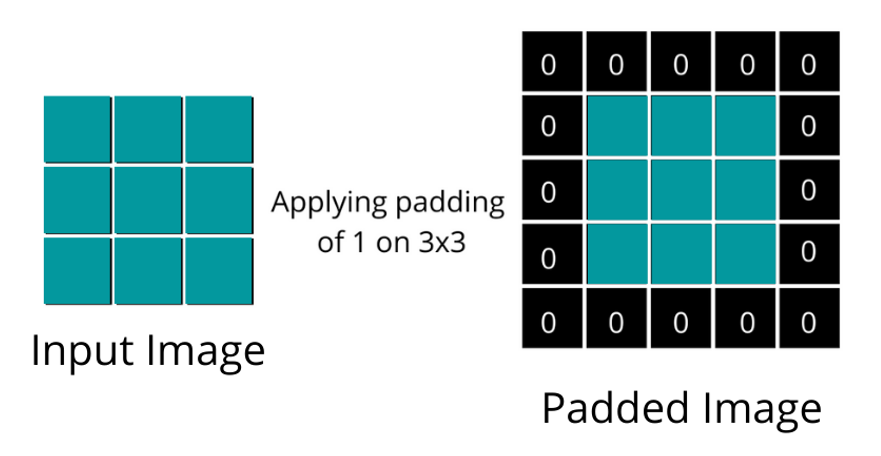

- `Analogy`- The safety border around a canvas.

## The Pooling Layer: Downsizing and AbstractionThe Pooling Layer: Downsizing and Abstraction

The Pooling Layer always follows the Convolution Layer. Its job is simple: reduce the size of the Feature Map while preserving the most important information. This dramatically reduces computation and helps the model become more robust to variations in the image (like slight shifts or rotations).

- **Max Pooling**: Picks the maximum value in a region → keeps strongest signal.

- **Average Pooling**: Takes the average of values → smoothens the feature map.

- `Analogy`: The Team Leader's Report
    - Imagine a team of 4 feature detectors working in a 2×2 area.

        - **Max Pooling**: The team leader only reports the highest value found in their 2×2 area.

            - **Benefit** : It captures the strongest evidence of a feature being present in that region and throws away 75% of the data, achieving massive downsizing. This makes the CNN slightly translation invariant (it still recognizes the feature even if it shifts a little).

        - **Average Pooling**: The team leader reports the average value found in their 2×2 area.

            - **Benefit** : It captures a smoother, more general representation of the feature, but is less common than Max Pooling.

## Code Example: The Keras Implementation

This Python code demonstrates how simple it is to stack these powerful layers in Keras. We're building a CNN to classify the MNIST digits, which is our next major step!

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Note: This is a structural template. Data loading (like MNIST) would precede this.

def build_simple_cnn(input_shape=(28, 28, 1), num_classes=10):
    """
    Builds a basic Convolutional Neural Network (CNN) architecture using Keras.
    This demonstrates the core stacking of Conv2D and MaxPooling2D layers.

    Args:
        input_shape (tuple): The shape of the input images (Height, Width, Channels).
                             (28, 28, 1) is typical for MNIST (grayscale).
        num_classes (int): The number of output classes (10 for digits 0-9).

    Returns:
        tf.keras.Model: The compiled CNN model.
    """
    print(f"Building CNN with input shape: {input_shape}")
    
    # --- 1. Sequential Model (The Stack) ---
    model = Sequential([
        # --- 2. Convolutional Layer 1 ---
        # Analogy: Finding 32 different simple features (edges, lines) in the image.
        Conv2D(32, (3, 3), # 32 filters, each 3x3 in size
               activation='relu', # Use ReLU for non-linearity (Day 58)
               input_shape=input_shape),
        
        # --- 3. Pooling Layer 1 ---
        # Analogy: Downsampling/Summarizing the feature map (Max Pool takes the strongest evidence).
        MaxPooling2D((2, 2)), # Reduces the feature map size by half (28x28 -> 14x14)
        
        # --- 4. Convolutional Layer 2 (Learning Complex Features) ---
        # Analogy: Now finding 64 more complex features by combining the simple ones.
        Conv2D(64, (3, 3), activation='relu'),
        
        # --- 5. Pooling Layer 2 ---
        MaxPooling2D((2, 2)), # Downsamples again (14x14 -> 7x7)
        
        # --- 6. Flattening (Transition to FFNN) ---
        # Once spatial feature extraction is done, we flatten the 7x7x64 map 
        # into a 1D vector to feed into the final FFNN Dense layers for classification.
        Flatten(),
        
        # --- 7. Dense (FFNN) Layers for Classification ---
        Dense(128, activation='relu'),
        
        # --- 8. Output Layer ---
        # Softmax is used for multi-class classification (Day 58).
        Dense(num_classes, activation='softmax')
    ])
    
    # --- 9. Compile the Model ---
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', # Appropriate loss for multi-class
                  metrics=['accuracy'])
    
    print("\nModel Summary:")
    model.summary()
    
    return model

if __name__ == '__main__':
    # Build and summarize the model
    cnn_model = build_simple_cnn()

    # Note: To fully train, you would need to load and preprocess the MNIST data here.
    print("\n[NOTE] Model built successfully. Training data (X_train, y_train) is needed to run model.fit().")


Building CNN with input shape: (28, 28, 1)

Model Summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)


[NOTE] Model built successfully. Training data (X_train, y_train) is needed to run model.fit().


## Summary of Day 65

We now know the two fundamental layers that make computer vision possible:

1. Convolution Layer: Uses Kernels (Filters) that learn to extract specific features (edges, textures) by sliding and performing a dot product.

2. Pooling Layer: Uses Max/Average Pooling to downsample the feature map, reducing computation and increasing translation invariance.

3. Strides and Padding: Hyper-parameters to control the size of the output feature maps.

We've got the building blocks! Now we just need to stack them!

## What's Next (Day 66)

Building a state-of-the-art CNN is more than just stacking layers—it's about the Architecture!

Tomorrow, on Day 66, we will deep dive into the history and evolution of the most influential CNN architectures! We will look at:

- LeNet (The grandfather of CNNs)

- AlexNet (The moment deep learning exploded)

- VGG16/VGG19 (The elegant architecture that proved depth matters)